# Recurrent Neural Network (RNN)

In [1]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN

In [2]:
# lets create a sine wave data
x = range(75)
X = [np.sin(2.0 * np.pi * i / 30) for i in x ]

In [3]:
# adding a noise in sine wave data
XN = X+0.1*np.random.uniform(low=-1.0, high=1.0, size=len(x))

In [4]:
int(len(XN))

75

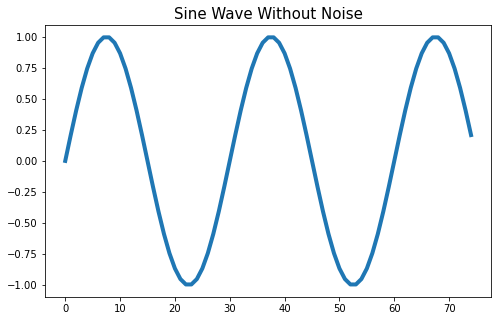

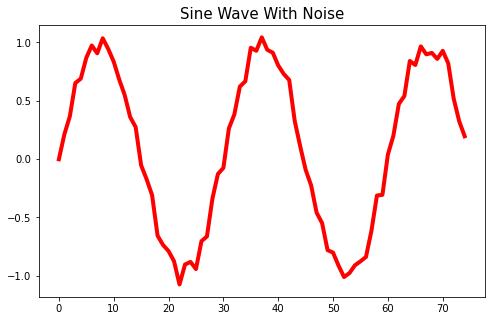

In [5]:
# lets plot the sine wave without noise and without noise
plt.figure(figsize=(8,5))
plt.plot(X, linewidth=4)
plt.title("Sine Wave Without Noise", fontsize=15)
plt.show()

# lets make a dataframe of sine wave with noise data
df1 = pd.DataFrame(XN).values

plt.figure(figsize=(8,5))
plt.plot(df1, linewidth=4, color='red')
# plt.plot(range(0,int(len(XN)/2+1)),df1[:int(len(XN)/2+1)], linewidth=4)
# plt.plot(range(int(len(XN)/2),int(len(XN))),df1[int(len(XN)/2):], linewidth=4)
plt.title("Sine Wave With Noise", fontsize=15)
# plt.legend()
plt.show()

In [6]:
# lets check the sine wave with noise data valies
print(df1)

[[-0.00236283]
 [ 0.21094307]
 [ 0.36572042]
 [ 0.65089978]
 [ 0.68893262]
 [ 0.86689993]
 [ 0.97280331]
 [ 0.90615978]
 [ 1.03472492]
 [ 0.94323589]
 [ 0.83417344]
 [ 0.68176764]
 [ 0.54862573]
 [ 0.35985565]
 [ 0.27373884]
 [-0.05353099]
 [-0.17372664]
 [-0.30984796]
 [-0.65684072]
 [-0.73723736]
 [-0.78922036]
 [-0.87597965]
 [-1.07504756]
 [-0.90430797]
 [-0.88181771]
 [-0.94309769]
 [-0.70460172]
 [-0.66366116]
 [-0.33949204]
 [-0.12869101]
 [-0.07622262]
 [ 0.26163793]
 [ 0.38223656]
 [ 0.6204373 ]
 [ 0.66614296]
 [ 0.95359508]
 [ 0.92763649]
 [ 1.04257758]
 [ 0.93573764]
 [ 0.91152008]
 [ 0.80154795]
 [ 0.7289906 ]
 [ 0.67762092]
 [ 0.32813925]
 [ 0.11047276]
 [-0.09237637]
 [-0.2264185 ]
 [-0.46004673]
 [-0.5492647 ]
 [-0.78087515]
 [-0.80240453]
 [-0.91376045]
 [-1.01159689]
 [-0.97684768]
 [-0.9103572 ]
 [-0.8766063 ]
 [-0.83978903]
 [-0.61416793]
 [-0.31255746]
 [-0.30727748]
 [ 0.03916505]
 [ 0.19993349]
 [ 0.47256239]
 [ 0.53988568]
 [ 0.84054493]
 [ 0.80555263]
 [ 0.96512

In [7]:
firstHalfCyclePercentage = (15/len(X))
firstHalfCyclePercentage

0.2

In [8]:
# splitting dataset into 20% training and 80% testing split
training_size=int(len(df1)*0.20)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [9]:
print("Training Size : ",training_size)
print("Testing Size : ",test_size)

Training Size :  15
Testing Size :  60


In [10]:
# lets make a dataset for time series
def make_dataset_for_time_series_analysis(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0] 
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [11]:
# predict the future values on how many previous values
previous_values = 2

In [12]:
time_step = previous_values
X_train, y_train = make_dataset_for_time_series_analysis(train_data, time_step)
X_test, ytest = make_dataset_for_time_series_analysis(test_data, time_step)

In [13]:
# lets reshape the training and testing data that actually use for RNN model
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [14]:
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (12, 2, 1)
Testing shape: (57, 2, 1)


In [15]:
# Create the RNN model with 30 hidden neurons
model = Sequential()
model.add(SimpleRNN(units = 30, input_shape=(None,1)))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# check the summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [16]:
#fit the model
import time
start = time.time()
# lets fit the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=500,batch_size=4,verbose=1)
end = time.time()
print(f"Execution time: {end-start} seconds")

Epoch 1/500
3/3 [==============================] - 1s 201ms/step - loss: 0.1280 - val_loss: 0.0918
Epoch 2/500
3/3 [==============================] - 0s 32ms/step - loss: 0.0670 - val_loss: 0.0663
Epoch 3/500
3/3 [==============================] - 0s 35ms/step - loss: 0.0367 - val_loss: 0.0604
Epoch 4/500
3/3 [==============================] - 0s 34ms/step - loss: 0.0403 - val_loss: 0.0636
Epoch 5/500
3/3 [==============================] - 0s 34ms/step - loss: 0.0462 - val_loss: 0.0663
Epoch 6/500
3/3 [==============================] - 0s 28ms/step - loss: 0.0486 - val_loss: 0.0655
Epoch 7/500
3/3 [==============================] - 0s 31ms/step - loss: 0.0456 - val_loss: 0.0625
Epoch 8/500
3/3 [==============================] - 0s 29ms/step - loss: 0.0375 - val_loss: 0.0624
Epoch 9/500
3/3 [==============================] - 0s 33ms/step - loss: 0.0344 - val_loss: 0.0649
Epoch 10/500
3/3 [==============================] - 0s 33ms/step - loss: 0.0326 - val_loss: 0.0681
Epoch 11/500
3/3 [

Epoch 84/500
3/3 [==============================] - 0s 28ms/step - loss: 0.0151 - val_loss: 0.1094
Epoch 85/500
3/3 [==============================] - 0s 37ms/step - loss: 0.0150 - val_loss: 0.1107
Epoch 86/500
3/3 [==============================] - 0s 30ms/step - loss: 0.0147 - val_loss: 0.1111
Epoch 87/500
3/3 [==============================] - 0s 27ms/step - loss: 0.0148 - val_loss: 0.1090
Epoch 88/500
3/3 [==============================] - 0s 31ms/step - loss: 0.0149 - val_loss: 0.1088
Epoch 89/500
3/3 [==============================] - 0s 29ms/step - loss: 0.0148 - val_loss: 0.1082
Epoch 90/500
3/3 [==============================] - 0s 25ms/step - loss: 0.0149 - val_loss: 0.1051
Epoch 91/500
3/3 [==============================] - 0s 26ms/step - loss: 0.0144 - val_loss: 0.1047
Epoch 92/500
3/3 [==============================] - 0s 26ms/step - loss: 0.0144 - val_loss: 0.1044
Epoch 93/500
3/3 [==============================] - 0s 27ms/step - loss: 0.0151 - val_loss: 0.1014
Epoch 94/5

3/3 [==============================] - 0s 41ms/step - loss: 0.0128 - val_loss: 0.0654
Epoch 167/500
3/3 [==============================] - 0s 34ms/step - loss: 0.0125 - val_loss: 0.0632
Epoch 168/500
3/3 [==============================] - 0s 34ms/step - loss: 0.0126 - val_loss: 0.0612
Epoch 169/500
3/3 [==============================] - 0s 34ms/step - loss: 0.0128 - val_loss: 0.0618
Epoch 170/500
3/3 [==============================] - 0s 35ms/step - loss: 0.0131 - val_loss: 0.0609
Epoch 171/500
3/3 [==============================] - 0s 35ms/step - loss: 0.0128 - val_loss: 0.0632
Epoch 172/500
3/3 [==============================] - 0s 36ms/step - loss: 0.0127 - val_loss: 0.0627
Epoch 173/500
3/3 [==============================] - 0s 37ms/step - loss: 0.0134 - val_loss: 0.0642
Epoch 174/500
3/3 [==============================] - 0s 35ms/step - loss: 0.0128 - val_loss: 0.0630
Epoch 175/500
3/3 [==============================] - 0s 36ms/step - loss: 0.0124 - val_loss: 0.0609
Epoch 176/500


3/3 [==============================] - 0s 29ms/step - loss: 0.0125 - val_loss: 0.0496
Epoch 249/500
3/3 [==============================] - 0s 29ms/step - loss: 0.0123 - val_loss: 0.0492
Epoch 250/500
3/3 [==============================] - 0s 27ms/step - loss: 0.0124 - val_loss: 0.0488
Epoch 251/500
3/3 [==============================] - 0s 27ms/step - loss: 0.0126 - val_loss: 0.0490
Epoch 252/500
3/3 [==============================] - 0s 25ms/step - loss: 0.0130 - val_loss: 0.0508
Epoch 253/500
3/3 [==============================] - 0s 26ms/step - loss: 0.0125 - val_loss: 0.0497
Epoch 254/500
3/3 [==============================] - 0s 33ms/step - loss: 0.0125 - val_loss: 0.0499
Epoch 255/500
3/3 [==============================] - 0s 42ms/step - loss: 0.0125 - val_loss: 0.0485
Epoch 256/500
3/3 [==============================] - 0s 30ms/step - loss: 0.0128 - val_loss: 0.0472
Epoch 257/500
3/3 [==============================] - 0s 28ms/step - loss: 0.0127 - val_loss: 0.0475
Epoch 258/500


3/3 [==============================] - 0s 27ms/step - loss: 0.0123 - val_loss: 0.0448
Epoch 331/500
3/3 [==============================] - 0s 37ms/step - loss: 0.0129 - val_loss: 0.0459
Epoch 332/500
3/3 [==============================] - 0s 25ms/step - loss: 0.0123 - val_loss: 0.0458
Epoch 333/500
3/3 [==============================] - 0s 24ms/step - loss: 0.0123 - val_loss: 0.0458
Epoch 334/500
3/3 [==============================] - 0s 26ms/step - loss: 0.0125 - val_loss: 0.0449
Epoch 335/500
3/3 [==============================] - 0s 27ms/step - loss: 0.0123 - val_loss: 0.0455
Epoch 336/500
3/3 [==============================] - 0s 26ms/step - loss: 0.0122 - val_loss: 0.0465
Epoch 337/500
3/3 [==============================] - 0s 25ms/step - loss: 0.0125 - val_loss: 0.0479
Epoch 338/500
3/3 [==============================] - 0s 30ms/step - loss: 0.0127 - val_loss: 0.0465
Epoch 339/500
3/3 [==============================] - 0s 47ms/step - loss: 0.0126 - val_loss: 0.0460
Epoch 340/500


3/3 [==============================] - 0s 24ms/step - loss: 0.0132 - val_loss: 0.0459
Epoch 413/500
3/3 [==============================] - 0s 26ms/step - loss: 0.0122 - val_loss: 0.0463
Epoch 414/500
3/3 [==============================] - 0s 30ms/step - loss: 0.0123 - val_loss: 0.0463
Epoch 415/500
3/3 [==============================] - 0s 23ms/step - loss: 0.0123 - val_loss: 0.0463
Epoch 416/500
3/3 [==============================] - 0s 24ms/step - loss: 0.0130 - val_loss: 0.0484
Epoch 417/500
3/3 [==============================] - 0s 28ms/step - loss: 0.0124 - val_loss: 0.0473
Epoch 418/500
3/3 [==============================] - 0s 29ms/step - loss: 0.0121 - val_loss: 0.0455
Epoch 419/500
3/3 [==============================] - 0s 25ms/step - loss: 0.0124 - val_loss: 0.0442
Epoch 420/500
3/3 [==============================] - 0s 25ms/step - loss: 0.0126 - val_loss: 0.0448
Epoch 421/500
3/3 [==============================] - 0s 26ms/step - loss: 0.0126 - val_loss: 0.0466
Epoch 422/500


3/3 [==============================] - 0s 29ms/step - loss: 0.0122 - val_loss: 0.0453
Epoch 495/500
3/3 [==============================] - 0s 26ms/step - loss: 0.0126 - val_loss: 0.0440
Epoch 496/500
3/3 [==============================] - 0s 26ms/step - loss: 0.0125 - val_loss: 0.0438
Epoch 497/500
3/3 [==============================] - 0s 28ms/step - loss: 0.0123 - val_loss: 0.0449
Epoch 498/500
3/3 [==============================] - 0s 29ms/step - loss: 0.0122 - val_loss: 0.0473
Epoch 499/500
3/3 [==============================] - 0s 26ms/step - loss: 0.0123 - val_loss: 0.0481
Epoch 500/500
3/3 [==============================] - 0s 30ms/step - loss: 0.0123 - val_loss: 0.0478
Execution time: 36.838072061538696 seconds


In [17]:
# lets check the predicted values on training and testing
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

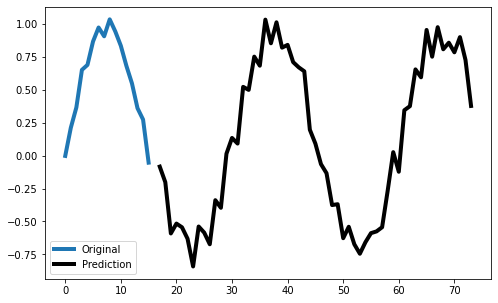

In [28]:
plt.figure(figsize=(8,5))
look_back=2

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(range(0,16),df1[:16], label='Original', linewidth=4)
plt.plot(testPredictPlot, label='Prediction', linewidth=4,color='black')
plt.legend()
plt.show()